# Tugas Kelompok Akhir PAD
Kelompok Rekayasa Data dan Intelegensi Bisnis

|Nama|NPM|Kontribusi|
|:---|:---:|:---|
|Muhammad Naufal Faza|2006577252|Feature extraction dan training model random forest, decision tree, bagging, dan neural network|
|Michael Harditya|2006577265|Preprocessing, training model neural network dan pembuatan markdown|
|Salma Dewi Taufiqoh|2006577473|Pembuatan laporan (abstrak, optimasi model, referensi paper, hasil analisis, dan kesimpulan)|
|Kenya Damayanti Priyatna|2206107546|Pembuatan laporan (pendahuluan, flowchart churn predictor, model random forest, hasil dan analisa, source code)|
|Vemby Somadias|2306294096|Pembuatan laporan (penjelasan dataset, pre-processing, model neural network, dan metrik evaluasi)|

# Import dataset

Dataset yang digunakan dalam kode ini dapat diakses pada:

https://bigml.com/user/cesareconti89/gallery/dataset/58cfbada49c4a13341003cba

Dataset akan dibersihkan pada tahapan ini juga, termasuk merubah beberapa nilai string menjadi nilai numerik
1. Yes menjadi 1 dan No menjadi 0
2. True menjadi 1 dan False menjadi 0

In [159]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [160]:
np.random.seed(42)
df = pd.read_csv('churn_dataset.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [161]:
df.replace({"Yes": 1, "True": 1, "No": 0, "False": 0}, inplace=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## **Mutual Information**
$$ I(X,Y) = \sum_{x,y} \int \left( \log\left( \frac{\mu(x,y)}{\rho(x)\mu(y)} \right) \right) d\gamma $$
$ I(X,Y) $ adalah Mutual Information antara X dan Y.

$ {\mu(x,y)} $ adalah fungsi joint probability mass atau density function antara X dan Y, yaitu probabilitas dari kejadian (x,y).

$ p(x) $ dan $ {\mu(y)} $ adalah fungsi marginal probability mass atau density function untuk x, yaitu probabilitas dari kejadian (x) untuk p(x), dan y untuk $ {\mu(y)} $.

Probabilitas dapat juga diganti dengan entropi, yang mengambil dari seluruh data x dan seluruh data y apakah saling berhubungan.

In [163]:
# Separating features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Excluding non-numeric features for the current analysis
numeric_features = X.select_dtypes(include=[np.number])

# Recalculating Information Gain
info_gain_numeric = mutual_info_classif(numeric_features, y, discrete_features='auto')

# Create a DataFrame for Information Gain for numeric features
info_gain_df_numeric = pd.DataFrame({'Feature': numeric_features.columns, 'Information Gain': info_gain_numeric})

# Recalculating Correlation for numeric features
correlation_numeric = numeric_features.apply(lambda x: x.corr(y))

# Create a DataFrame for Correlation for numeric features
correlation_df_numeric = pd.DataFrame({'Feature': numeric_features.columns, 'Correlation': np.abs(correlation_numeric)})

# Merging the two DataFrames on Feature for numeric features
feature_ranking_numeric = pd.merge(info_gain_df_numeric, correlation_df_numeric, on='Feature')

# Sorting the DataFrame based on Information Gain and Correlation for numeric features
feature_ranking_numeric.sort_values(by=['Information Gain', 'Correlation'], ascending=False, inplace=True)

feature_ranking_numeric.reset_index(drop=True, inplace=True)

feature_ranking_numeric



,Feature,Information Gain,Correlation
0,Total day minutes,0.054456,0.205151
1,Total day charge,0.051735,0.205151
2,Customer service calls,0.038042,0.208750
3,International plan,0.023663,0.259852
4,Number vmail messages,0.010412,0.089728
5,Total intl minutes,0.010018,0.068239
6,Area code,0.006019,0.006174
7,Total night charge,0.005234,0.035496
8,Voice mail plan,0.003154,0.102148
9,Total night minutes,0.002755,0.035493


Dari hasil ekstraksi Information Gain dengan metode Mutual Information dan korelasi tiap fitur terhadap target, nilai-nilai yang muncul akan diranking dari terbesar hingga terkecil. Nilai dengan korelasi di bawah 0.01 **ATAU** nilai Information Gain di bawah atau sama dengan 0 akan didrop. Hasil akhir menunjukkan bahwa fitur terseleksi berdasarkan Information Gain dan nilai korelasi terdapat 16 fitur penting

In [164]:
# # Eliminating features with 0 Information Gain
# feature_ranking_filtered = feature_ranking_numeric[(feature_ranking_numeric['Correlation'] > 0.01) | (feature_ranking_numeric['Information Gain'] > 0)]

# feature_ranking_filtered.reset_index(drop=True, inplace=True)
# feature_ranking_filtered['Feature'].values

array(['Total day minutes', 'Total day charge', 'Customer service calls',
       'International plan', 'Number vmail messages',
       'Total intl minutes', 'Area code', 'Total night charge',
       'Voice mail plan', 'Total night minutes', 'Account length',
       'Total day calls', 'Total eve minutes', 'Total eve charge',
       'Total intl charge', 'Total intl calls'], dtype=object)

In [165]:
# X = numeric_features.drop(columns=[col for col in numeric_features.columns if col not in feature_ranking_filtered['Feature'].values])
# X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2
3329,68,415,0,0,0,231.1,57,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3
3330,28,510,0,0,0,180.8,109,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2
3331,184,510,1,0,0,213.8,105,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2


Percobaan sudah dilakukan untuk tiap model dengan Mutual Information dan tidak dengan Mutual Information, hasil menunjukan bahwa tanpa Mutual Information dapat menghasilkan hasil yang lebih baik, sehingga fitur yang akan digunakan pada pelatihan adalah semua fitur kecuali fitur State, karena pada paper referensi juga tidak menggunakan fitur tersebut. 

## **Normalisasi data dengan Z-score**
$$ X(stand) = \frac{x - mean (x)}{std_\text{dev}} $$
dimana $${mean = 0}, {std_\text{dev}} = 1 $$

Normalisasi dilakukan dengan menghitung z-score dari tiap data, dengan mengurangi tiap nilai x dengan rata-ratanya, dibagi dengan standar deviasinya.

In [166]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(pd.get_dummies(numeric_features))

# Converting the standardized features back to a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=numeric_features.columns)

# Displaying the first few rows of the standardized features
X_standardized_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


# Proses Training

## **Split train dan test data**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

## **Random Forest**

Model Matematis:

$$
\hat{Y}_{\text{RF}}(x) = \text{mode}(\{\hat{Y}_1(x), \hat{Y}_2(x), ..., \hat{Y}_N(x)\})
$$
yang artinya prediksi diambil dari voting terbanyak pohon keputusan yang terbentuk.

Algoritma Optimasi: **Grid Search CV**
Grid Search Cross-Validation atau Grid Search CV bekerja dengan beberapa tahapan berikut:
1. Mendefinisikan Grid Parameter, berisi hyperparameter yang akan digunakan pada model  yang juga akan dicari nilai optimalnya.
2. Melakukan Cross-Validation untuk tiap kombinasi pada Grid, melakukan cross-validation dan menghitung rata-rata nilai evaluasi dari tiap kombinasi.
3. Memilih Kombinasi Terbaik dari seluruh nilai evaluasi yang ada sebagai parameter yang akan digunakan pada model.

Persamaan cross-validation adalah sebagai berikut:
$$ CV(h) = \frac{1}{k} \sum_{i=1}^{k} Score(Model(h; Train_i), Test_i) $$
- $k$ adalah fold atau kombinasi dari cross-validation
- $Score(Model(h;Train_i,Test_i))$ adalah nilai dari model yang menggunakan hyperparameter $h$ pada data fold training $Train_i$ dan dievaluasi dengan fold testing $Test_i$.
- $Model(h;Train_i)$ adalah model yang sedang dilatih (training) dengan hyperparameter $h$ dengan fold training $Train_i$.

Parameter optimal dari hyperparameter $h*$ adalah
$$h* = \arg\max_{h} CV(h)$$

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=None, min_samples_split=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=s

/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1680 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/base.py", line

Best parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


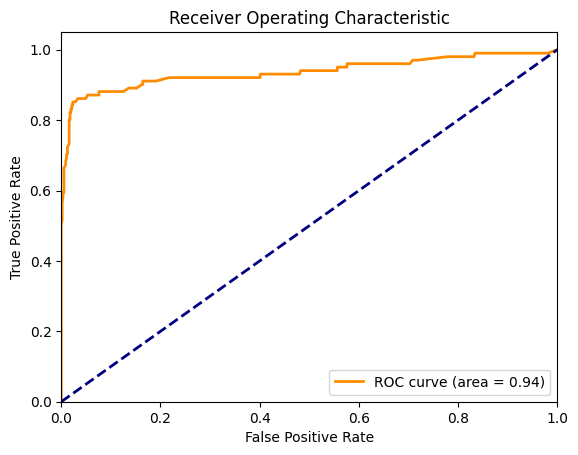

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.92      0.70      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.88       667
weighted avg       0.95      0.95      0.94       667

confusion_matrix:  [[560   6]
 [ 30  71]]
ROC area:  0.9361596053598291


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
# Train the Random Forest Classifier using the best parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)
rf_classifier_best.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_classifier_best.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve and AUC
y_pred_prob = rf_classifier_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(classification_rep)
print("confusion_matrix: ", conf_matrix)
print("ROC area: ", roc_auc)


## J48

J48 adalah algoritma yang mengimplementasikan decision tree,
dimana algoritma ini menggunakan tree tunggal, berbeda dari random forest yang menggunakan
beberapa decision tree yang dikombinasikan oleh hyperparameter.
Algoritma ini menggunakan konsep information gain melalui nilai entropynya.

Nilai entropy H(S) dihitung dengan persamaan:
$$ H(S) = - \sum_{i=1}^{n} p_i \log_2 p_i$$
$$IG(A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$
dimana:
$p_i$ adalah peluang dari $S$ berada pada kelas $i$.

$n$ adalah jumlah kelas.

$Values(A)$ adalah nilai semua nilai $A$.

$S_v$ adalah subset dari $S$ dimana $A$ memiliki nilai $v$.

$|S_v|$ dan $|S|$ adalah jumlah dari $S_v$ dan $S$ secara berurutan.


Fitting 10 folds for each of 1728 candidates, totalling 17280 fits
Best parameters found by grid search: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 7}
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.85      0.67      0.75       101

    accuracy                           0.93       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[554  12]
 [ 33  68]]


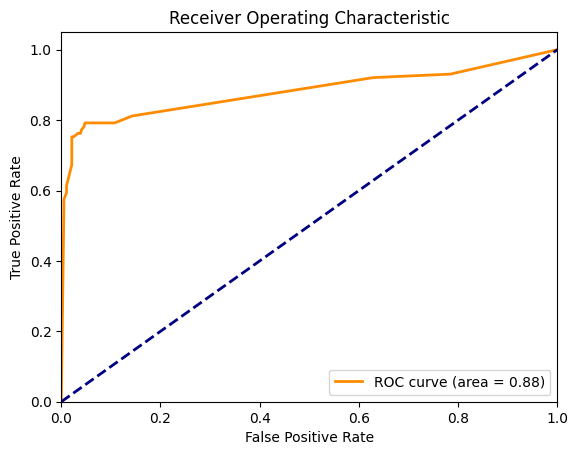

In [200]:
from sklearn.tree import DecisionTreeClassifier
# Setting up the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

# Creating the Decision Tree classifier
dtree = DecisionTreeClassifier()

# Setting up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=10, n_jobs=-1, verbose=1)

# Performing grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
print("Best parameters found by grid search:", grid_search.best_params_)

# Training the classifier with the best parameters
best_tree = grid_search.best_estimator_

# Predicting the test set results
y_pred = best_tree.predict(X_test)

# Evaluating the classifier with classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC
y_pred_proba = best_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Bagging + Random Forest

Bagging adalah suatu metode yang secara acak akan memilih subset dari data training, dan melatih decision tree untuk tiap subset. Proses ini diulang beberapa kali untuk subset yang berbeda sehingga menghasilkan beragam decision tree yang berbeda yang kemudian akan dicari kembali tree terbaik yang merepresentasikan data keseluruhan.

Fitting 10 folds for each of 2 candidates, totalling 20 fits


/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `bas

[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  36.9s
[CV] END base_estimator__max_depth=19, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.0s


/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=19, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.1s
[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.2s
[CV] END base_estimator__max_depth=19, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.2s


/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=19, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.4s
[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.4s
[CV] END base_estimator__max_depth=19, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.3s
[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.8s
[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.6s
[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=2, n_estimators=100; total time=  37.6s
[CV] END base_estimator__max_depth=None, base_estimator__min_samples_leaf=1, base_estimator__min_s

/home/serverai/miniconda3/envs/compvis-nf/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found by grid search: {'base_estimator__max_depth': 19, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'n_estimators': 100}
BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=19),
                  n_estimators=100)
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       566
        True       0.93      0.66      0.77       101

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:
 [[561   5]
 [ 34  67]]
ROC area:  0.9362033376482525


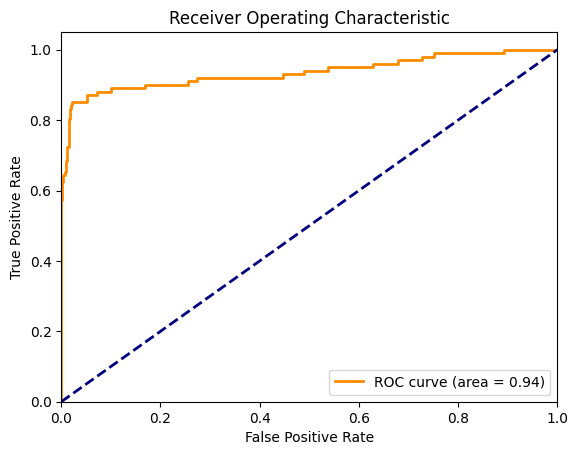

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming X_standardized_df and y are already defined and preprocessed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for grid search
param_grid = {
    'base_estimator__max_depth': [None] + list(np.arange(19, 20)),  # Maximum number of levels in tree
    'base_estimator__min_samples_split': np.arange(2, 3),  # Minimum number of samples required to split a node
    'base_estimator__min_samples_leaf': np.arange(1,2),  # Minimum number of samples required at each leaf node
    'n_estimators': [100]  # Number of base estimators
}

# Creating the Random Forest classifier
random_forest = RandomForestClassifier()

# Creating the Bagging classifier with Random Forest
bagging_clf = BaggingClassifier(base_estimator=random_forest)

# Setting up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(bagging_clf, param_grid, cv=10, n_jobs=-1, verbose=2)

# Performing grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
print("Best parameters found by grid search:", grid_search.best_params_)

# Training the classifier with the best parameters
best_clf = grid_search.best_estimator_
print(best_clf)
# Predicting the test set results
y_pred = best_clf.predict(X_test)

# Evaluating the classifier with classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC area: ", roc_auc)
# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## **Neural Network**
Jaringan syaraf tiruan yang dioptimasi dengan algoritma optimasi Stochastic Gradient Descent.

Algoritma optimasi atau optimizer merupakan persamaan matematika yang digunakan untuk memperbaharui nilai bobot dan bias. Stochastic Gradient Descent menggunakan persamaan sebagai berikut:

$$ x^{(k+1)} = x^{(k)} - \eta \nabla f_{i_k}(x^{(k)})$$

$ x^{(k)} $ adalah vektor parameter pada iterasi k, pada bagian backpropagation terdapat weights dan bias sebagai x dari fungsi ini.

$\eta$ adalah learning rate.

$\nabla f_{i_k}(x^{(k)}) $ adalah gradien dari cost function terhadap parameter.

Terdiri dari 4 layer:
* Input Layer (Layer 0)
  - Tidak ada feed forward pada layer ini karena hanya diperuntukkan untuk menerima input data saja. Data tersebut bisa representasikan dalam matriks sebagai berikut: $$ \mathbf{x} = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix} $$

* Hidden Layer 1 (32 Neuron)/ Layer 1
  - Feed Forward: $$ y^{1} = \begin{bmatrix} y_{1}^{1} \\ \vdots \\y_{32}^{1}\end{bmatrix}=\begin{bmatrix}w_{1,1}^{1} & \ldots & w_{n,1}^{1} \\\vdots & \ddots & \vdots \\w_{32,1}^{1} & \ldots & w_{32,n}^{1}\end{bmatrix}\begin{bmatrix}x_{1} \\\vdots \\x_{n}\end{bmatrix}+\begin{bmatrix}b_{1}^{1}\\\vdots\\b_{32}^{1}\\\end{bmatrix} $$

  - Fungsi Aktivasi: $$ z^1 = \begin{bmatrix} z_{1}^{1} \\ \vdots \\ z_{32}^{1} \end{bmatrix} = \sigma \left( \begin{bmatrix} y^1_1 \\ \vdots \\ y^1_{32} \end{bmatrix} \right) $$
  dimana $$ \sigma(y^1) = max(0,y^1) $$
  - Backpropagation:
  1. Terhadap nilai bobot
  $$ dz^{1} = W^{2T} dz^{2} * \sigma'(z^{1}) $$
  $$ dW^{1} = \frac{1}{m} dz^{1} x^T $$
  2. Terhadap nilai bias
  $$ db^{1} = \frac{1}{m} \sum_{i=1}^{m} dz^{1}$$
  

* Hidden Layer 2 (16 Neuron)/ Layer 2
  - Feed Forward: $$ y^{2} = \begin{bmatrix} y_{1}^{2} \\ \vdots \\y_{16}^{2}\end{bmatrix}=\begin{bmatrix}w_{1,1}^{2} & \ldots & w_{1,32}^{2} \\\vdots & \ddots & \vdots \\w_{16,1}^{2} & \ldots & w_{16,32}^{2}\end{bmatrix}\begin{bmatrix}z_{1}^{1} \\\vdots \\z_{32}^{1}\end{bmatrix}+\begin{bmatrix}b_{1}^{2}\\\vdots\\b_{16}^{2}\\\end{bmatrix} $$
  - Fungsi Aktivasi: $$ z^2 = \begin{bmatrix} z_{1}^{2} \\ \vdots \\ z_{16}^{2} \end{bmatrix} = \sigma \left( \begin{bmatrix} y^2_1 \\ \vdots \\ y^2_{16} \end{bmatrix} \right) $$
  dimana $$ \sigma(y^2) = max(0,y^2) $$

  - Backpropagation:
  1. Terhadap nilai bobot
  $$ dz^{2} =  W^{3T} dz^{3} * \sigma'(z^{2}) $$
  $$ dW^{2} = \frac{1}{m} dz^{2} a^{1T}$$
  2. Terhadap nilai bias
  $$ db^{2} = \frac{1}{m} \sum_{i=1}^{m} dz^{2} $$

* Output Layer (1 Neuron)/ Layer 3
  - Feed Forward: $$ y^3 = \begin{bmatrix} w_{1,1}^3 & \ldots & w_{1,16}^3 \end{bmatrix} \begin{bmatrix} z_1^2 \\ \vdots \\ z_{16}^2 \end{bmatrix} + b_1^3$$
  - Fungsi Aktivasi: $$ y_{\text{out}} = \sigma(y^3) = \frac{1}{1 + e^{-y^3}} $$
  - Backpropagation:
  1. Terhadap nilai bobot
  $$ dz^{3} = a^{3} - y $$
  $$ dW^{3} = \frac{1}{m} dz^{3} a^{2T}$$
  2. Terhadap nilai bias
  $$ db^{3} = \frac{1}{m} \sum_{i=1}^{m} dz^{3} $$



In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=len(X_standardized_df.columns), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100


84/84 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8091 - val_loss: 0.4799 - val_accuracy: 0.8501
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8571 - val_loss: 0.4353 - val_accuracy: 0.8486
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8567 - val_loss: 0.4186 - val_accuracy: 0.8486
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8567 - val_loss: 0.4080 - val_accuracy: 0.8486
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8567 - val_loss: 0.3985 - val_accuracy: 0.8486
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8567 - val_loss: 0.3902 - val_accuracy: 0.8501
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8575 - val_loss: 0.3820 - val_accuracy: 0.8501
Epoch 8/100
84/84 [======

21/21 [==============================] - 0s 448us/step


Confusion Matrix:
[[552  14]
 [ 38  63]]
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       566
        True       0.82      0.62      0.71       101

    accuracy                           0.92       667
   macro avg       0.88      0.80      0.83       667
weighted avg       0.92      0.92      0.92       667

ROC area:  0.9165063149424484


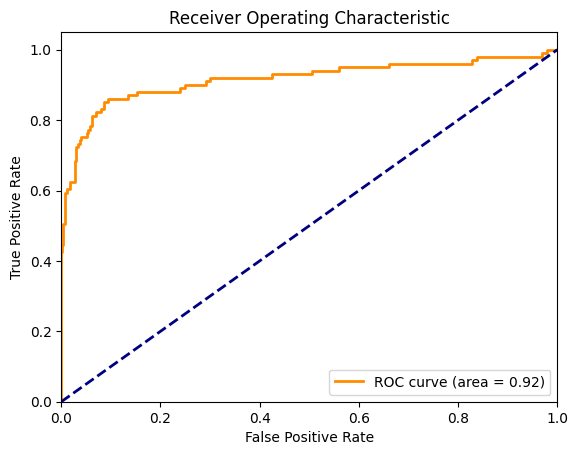

In [213]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mtx)
print("Classification Report:")
print(classification_rep)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC area: ", roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Training Accuracy: 0.9339835047721863
Training Loss: 0.19408604502677917
Validation Accuracy: 0.9220389723777771
Validation Loss: 0.21241901814937592


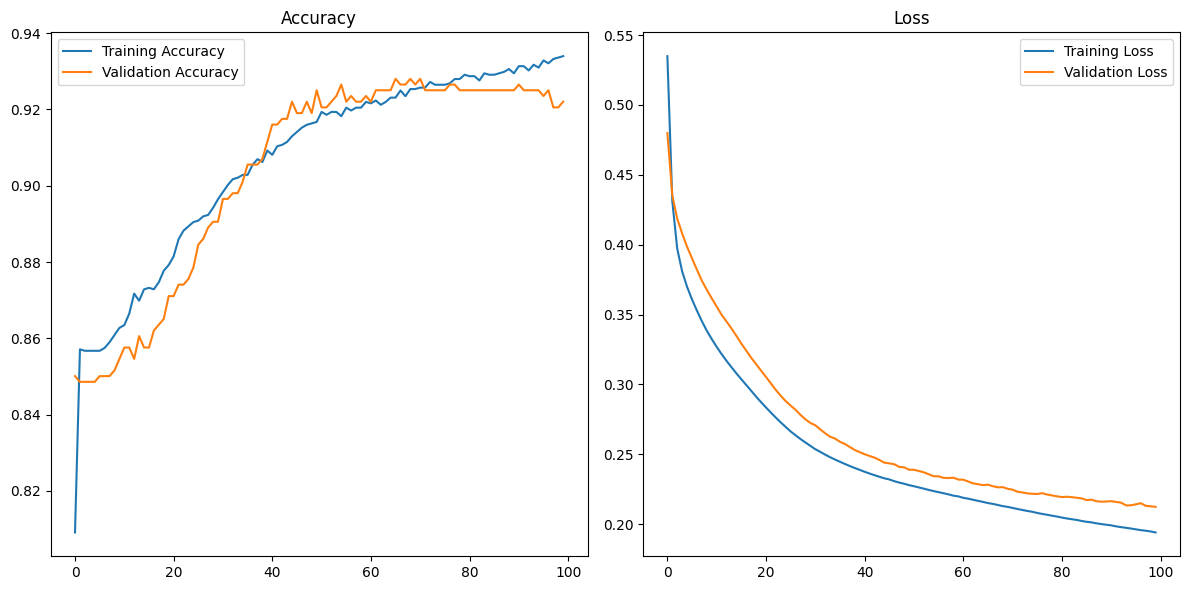

In [199]:

# Print the accuracy and loss
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {train_acc[-1]}')
print(f'Training Loss: {train_loss[-1]}')
print(f'Validation Accuracy: {val_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]}')

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
